# ***Social Media Ad Dataset***



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Loading & Initial Understanding**

In [ ]:
df = pd.read_csv('/content/social_media_ad_optimization.csv')

In [ ]:
df.head()

,user_id,age,gender,location,interests,ad_id,ad_category,ad_platform,ad_type,impressions,clicks,conversion,time_spent_on_ad,day_of_week,device_type,engagement_score
0,U0001,58,M,USA,Food,A0001,Sportswear,Facebook,Image,3,0,0,3.38,Friday,Mobile,0.02
1,U0002,55,F,USA,Tech,A0002,Electronics,Facebook,Image,9,9,1,6.77,Saturday,Tablet,0.93
2,U0003,52,F,UK,Gaming,A0003,Luggage,Instagram,Image,13,12,1,13.26,Wednesday,Mobile,0.93
3,U0004,31,F,USA,Tech,A0004,Gadgets,Facebook,Video,14,5,0,24.41,Saturday,Desktop,0.28
4,U0005,52,M,India,Tech,A0005,Luggage,Instagram,Carousel,10,5,0,21.43,Monday,Tablet,0.35


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           500 non-null    object 
 1   age               500 non-null    int64  
 2   gender            500 non-null    object 
 3   location          500 non-null    object 
 4   interests         500 non-null    object 
 5   ad_id             500 non-null    object 
 6   ad_category       500 non-null    object 
 7   ad_platform       500 non-null    object 
 8   ad_type           500 non-null    object 
 9   impressions       500 non-null    int64  
 10  clicks            500 non-null    int64  
 11  conversion        500 non-null    int64  
 12  time_spent_on_ad  500 non-null    float64
 13  day_of_week       500 non-null    object 
 14  device_type       500 non-null    object 
 15  engagement_score  500 non-null    float64
dtypes: float64(2), int64(4), object(10)
memory u

In [ ]:
df.describe()

,age,impressions,clicks,conversion,time_spent_on_ad,engagement_score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,39.410000,8.282000,4.520000,0.470000,14.072300,0.520220
std,12.400219,4.217351,3.727383,0.499599,9.088768,0.306296
min,18.000000,1.000000,0.000000,0.000000,0.460000,0.000000
25%,28.000000,4.750000,1.000000,0.000000,4.990000,0.270000
50%,39.000000,9.000000,4.000000,0.000000,13.285000,0.550000
75%,51.000000,12.000000,7.000000,1.000000,21.732500,0.772500
max,60.000000,15.000000,15.000000,1.000000,29.950000,1.000000


## **Data Cleaning and Preparation**

In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
user_id             0
age                 0
gender              0
location            0
interests           0
ad_id               0
ad_category         0
ad_platform         0
ad_type             0
impressions         0
clicks              0
conversion          0
time_spent_on_ad    0
day_of_week         0
device_type         0
engagement_score    0
ctr                 0
cvr                 0
dtype: int64


In [ ]:
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


## **Exploratory Data Analysis (EDA)**

In [ ]:
df.describe()

,age,impressions,clicks,conversion,time_spent_on_ad,engagement_score,ctr,cvr
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,39.410000,8.282000,4.520000,0.470000,14.072300,0.520220,53.986446,16.673768
std,12.400219,4.217351,3.727383,0.499599,9.088768,0.306296,34.036191,27.360578
min,18.000000,1.000000,0.000000,0.000000,0.460000,0.000000,0.000000,0.000000
25%,28.000000,4.750000,1.000000,0.000000,4.990000,0.270000,26.250000,0.000000
50%,39.000000,9.000000,4.000000,0.000000,13.285000,0.550000,53.333333,0.000000
75%,51.000000,12.000000,7.000000,1.000000,21.732500,0.772500,85.714286,20.000000
max,60.000000,15.000000,15.000000,1.000000,29.950000,1.000000,100.000000,100.000000


In [ ]:
print("\nUnique values and counts for categorical columns:")
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())


Unique values and counts for categorical columns:
user_id
U0500    1
U0001    1
U0002    1
U0003    1
U0484    1
        ..
U0009    1
U0008    1
U0007    1
U0006    1
U0005    1
Name: count, Length: 500, dtype: int64
gender
M        178
Other    169
F        153
Name: count, dtype: int64
location
Australia    101
Germany       98
India         92
Canada        75
UK            72
USA           62
Name: count, dtype: int64
interests
Tech       93
Travel     90
Fitness    84
Food       83
Gaming     78
Fashion    72
Name: count, dtype: int64
ad_id
A0001    10
A0002    10
A0003    10
A0004    10
A0005    10
A0006    10
A0007    10
A0008    10
A0009    10
A0010    10
A0011    10
A0012    10
A0013    10
A0014    10
A0015    10
A0016    10
A0017    10
A0018    10
A0019    10
A0020    10
A0021    10
A0022    10
A0023    10
A0024    10
A0025    10
A0026    10
A0027    10
A0028    10
A0029    10
A0030    10
A0031    10
A0032    10
A0033    10
A0034    10
A0035    10
A0036    10
A0037    10
A0

In [ ]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [ ]:
# Calculate conversion rate per click and engagement rate per impression
df['conversion_rate'] = (df['conversion'] / df['clicks']) * 100
df['engagement_rate'] = (df['engagement_score'] / df['impressions']) * 100

In [ ]:
# Handle potential division by zero for conversion_rate and engagement_rate where clicks or impressions are 0
df.loc[df['clicks'] == 0, 'conversion_rate'] = 0
df.loc[df['impressions'] == 0, 'engagement_rate'] = 0

In [ ]:
df.head()

,user_id,age,gender,location,interests,ad_id,ad_category,ad_platform,ad_type,impressions,...,conversion,time_spent_on_ad,day_of_week,device_type,engagement_score,ctr,cvr,age_group,conversion_rate,engagement_rate
0,U0001,58,M,USA,Food,A0001,Sportswear,Facebook,Image,3,...,0,3.38,Friday,Mobile,0.02,0.000000,0.000000,55-64,0.000000,0.666667
1,U0002,55,F,USA,Tech,A0002,Electronics,Facebook,Image,9,...,1,6.77,Saturday,Tablet,0.93,100.000000,11.111111,55-64,11.111111,10.333333
2,U0003,52,F,UK,Gaming,A0003,Luggage,Instagram,Image,13,...,1,13.26,Wednesday,Mobile,0.93,92.307692,8.333333,45-54,8.333333,7.153846
3,U0004,31,F,USA,Tech,A0004,Gadgets,Facebook,Video,14,...,0,24.41,Saturday,Desktop,0.28,35.714286,0.000000,25-34,0.000000,2.000000
4,U0005,52,M,India,Tech,A0005,Luggage,Instagram,Carousel,10,...,0,21.43,Monday,Tablet,0.35,50.000000,0.000000,45-54,0.000000,3.500000


In [ ]:
df.to_csv('social_media_ad_optimization_processed.csv', index=False)

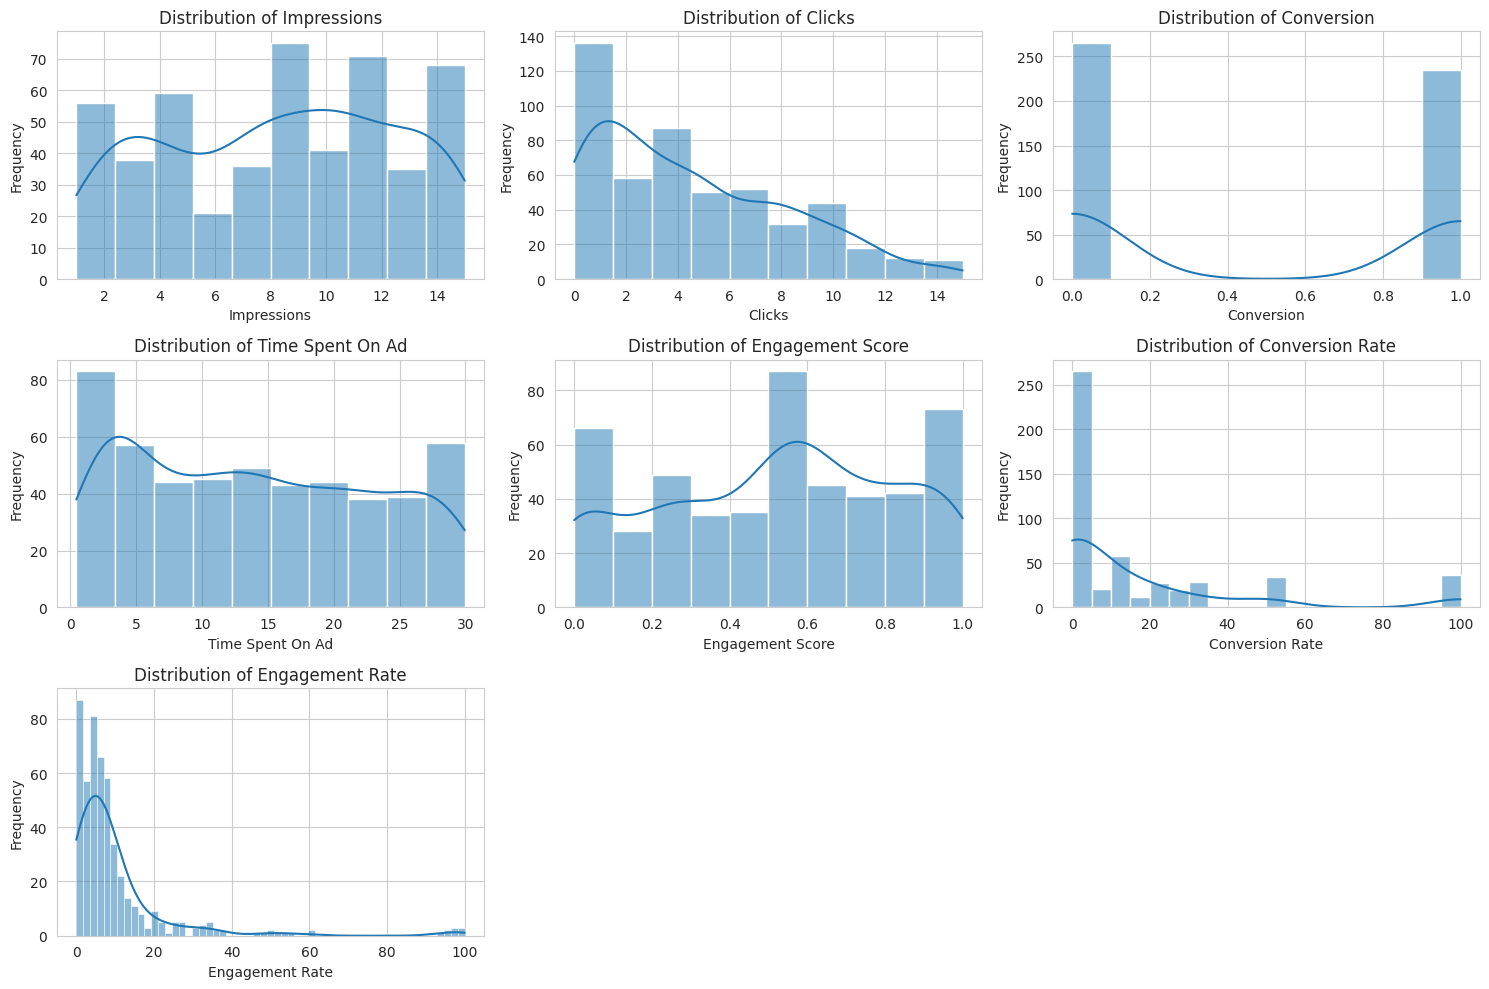

In [ ]:
# Set style for plots
sns.set_style("whitegrid")

# Create histograms for numerical columns
numerical_cols = ['impressions', 'clicks', 'conversion', 'time_spent_on_ad', 'engagement_score', 'conversion_rate', 'engagement_rate']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('numerical_distributions_histograms.png')
plt.show()

/tmp/ipython-input-30-1391504894.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-30-1391504894.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-30-1391504894.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-30-1391504894.py:7: FutureWarning: 

Passing `palette`

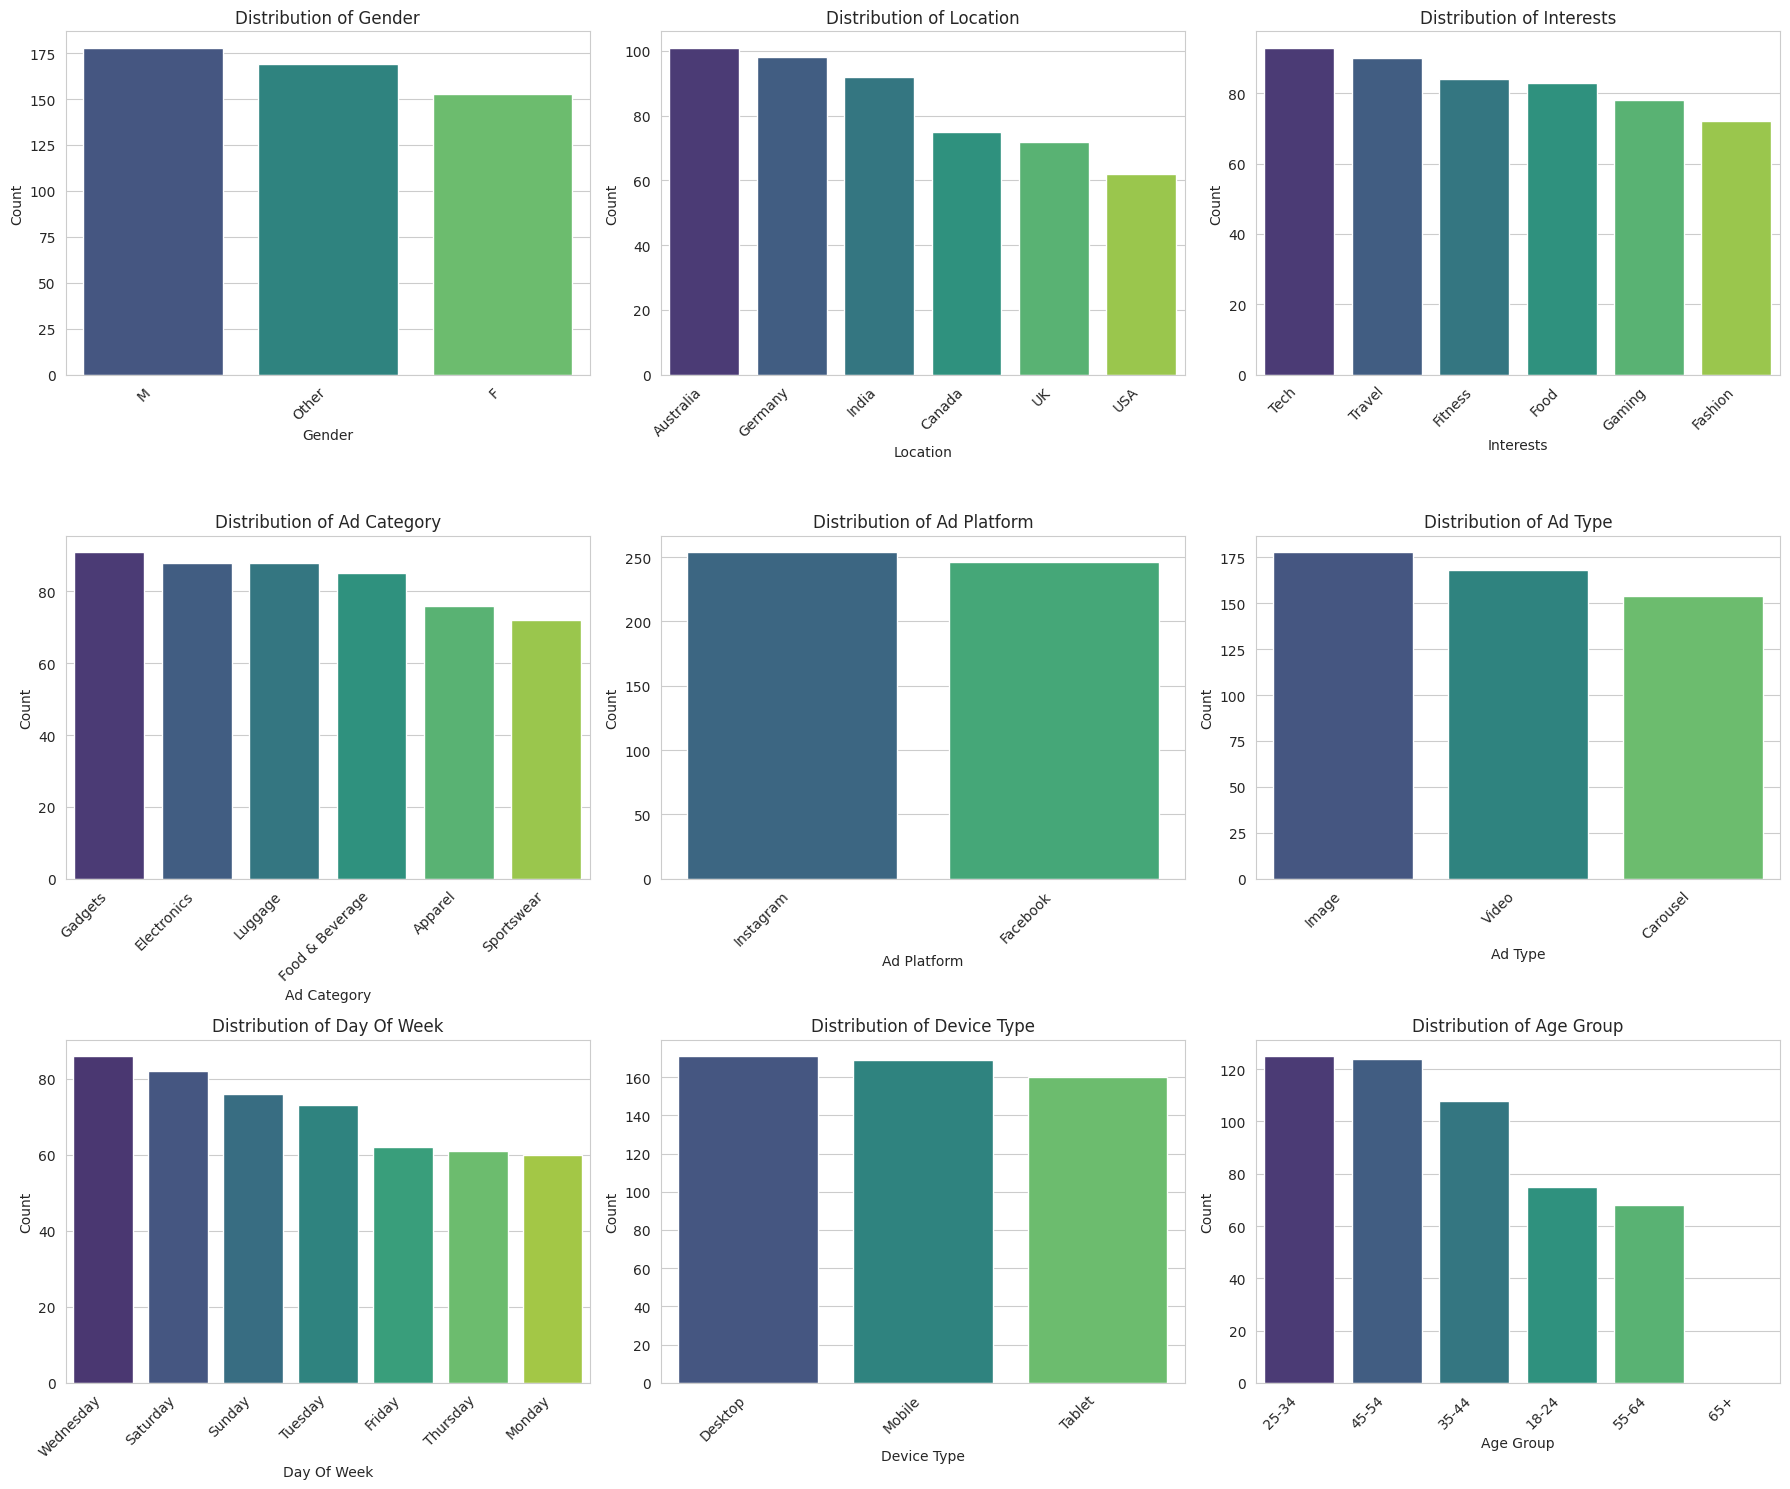

In [ ]:
# 1. Bar Charts for Counts of Categorical Variables
categorical_cols = ['gender', 'location', 'interests', 'ad_category', 'ad_platform', 'ad_type', 'day_of_week', 'device_type', 'age_group']

plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('categorical_counts_bar_charts.png')
plt.show()

/tmp/ipython-input-31-2603469277.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_data.index, y=avg_data.values, palette='magma')
/tmp/ipython-input-31-2603469277.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_data.index, y=avg_data.values, palette='magma')
/tmp/ipython-input-31-2603469277.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_data.index, y=avg_data.values, palette='magma')
/tmp/ipython-input-31-2603469277.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

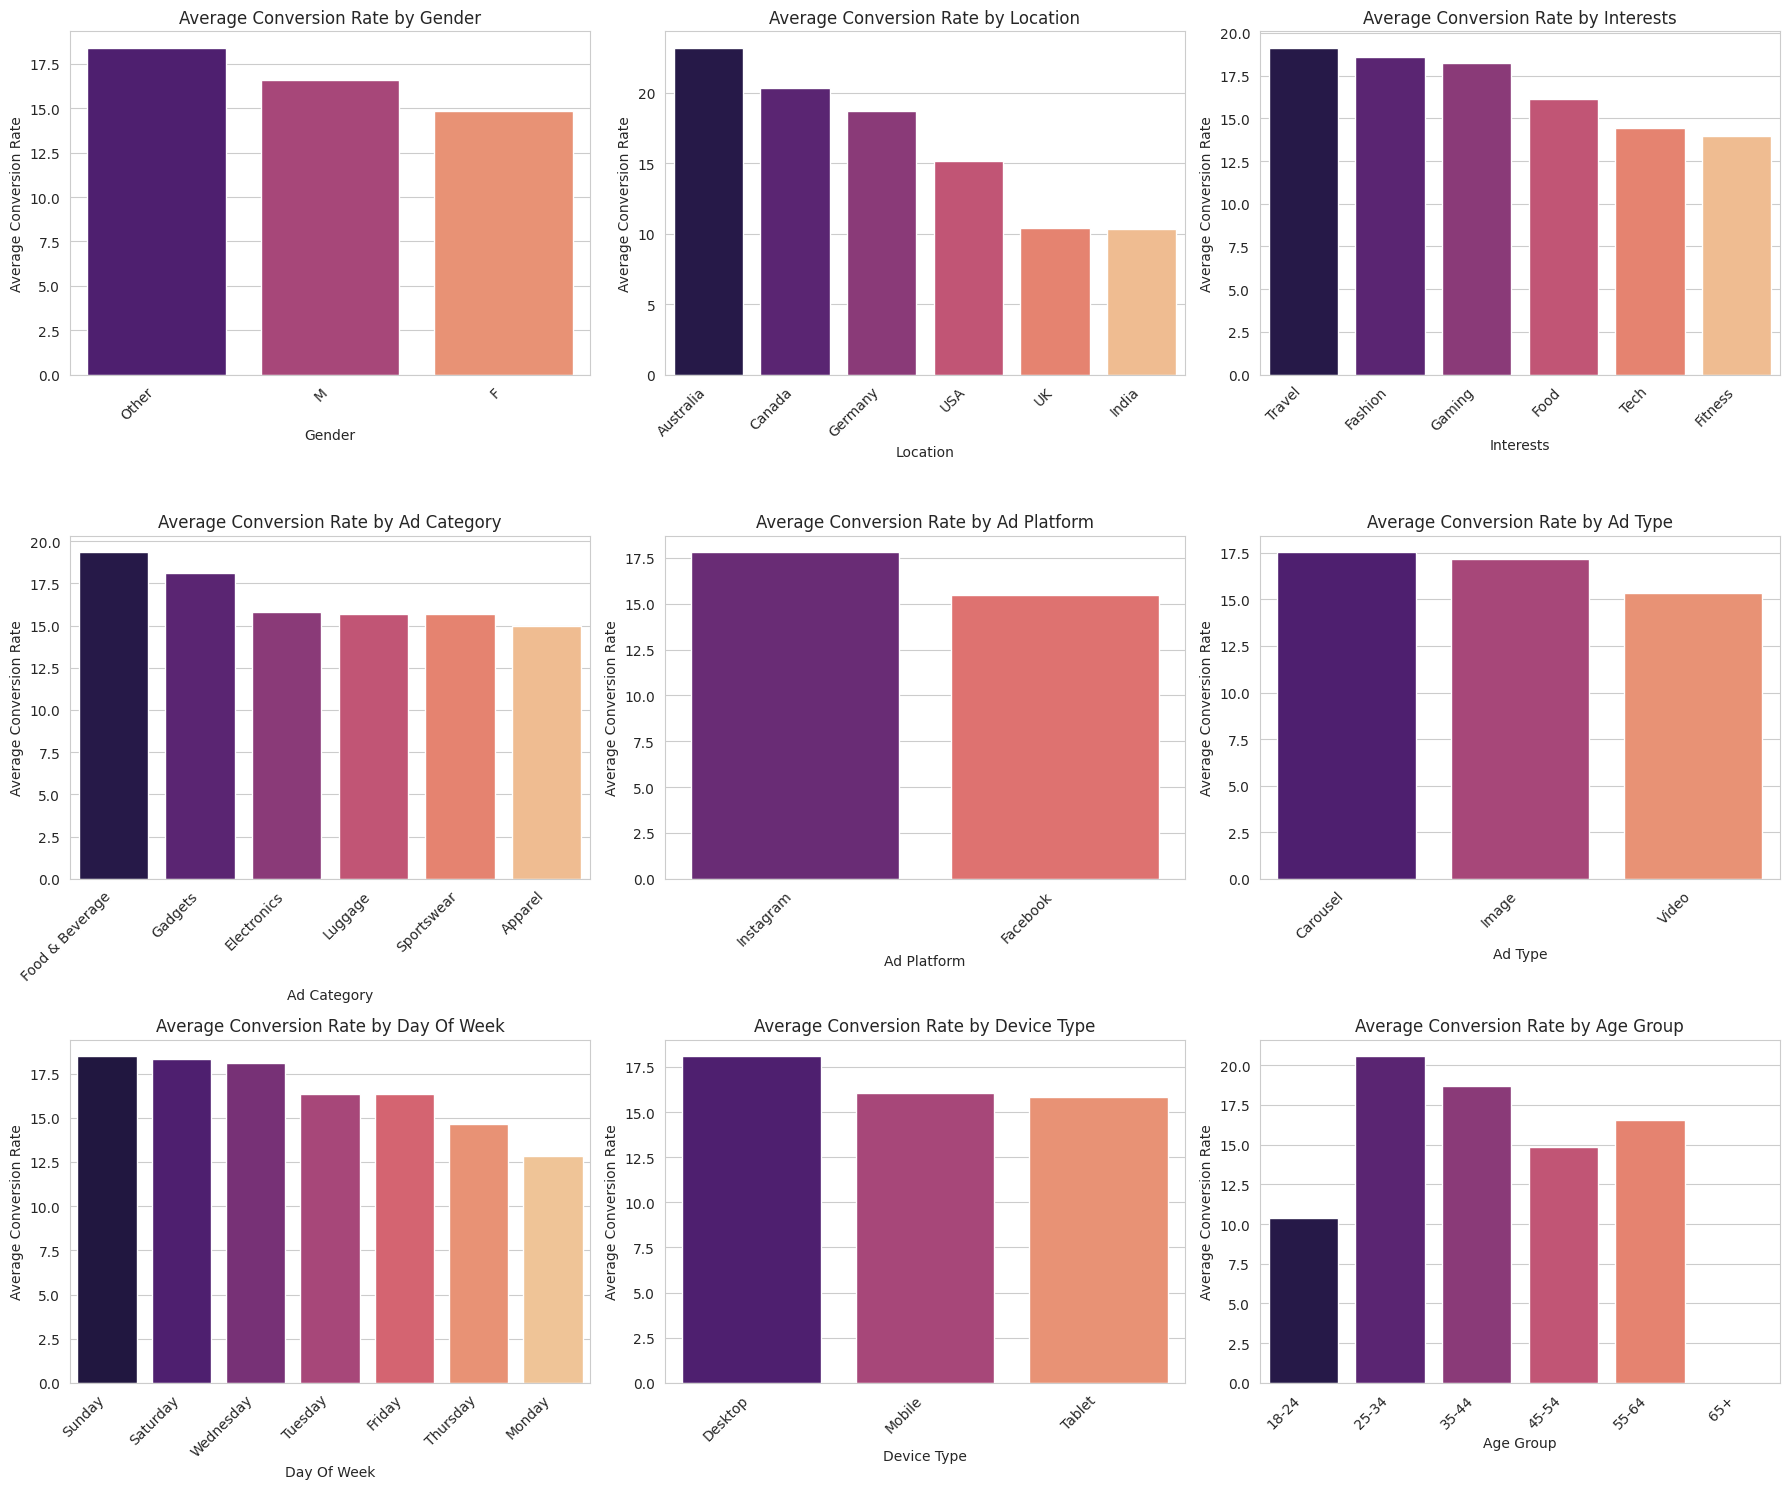

/tmp/ipython-input-31-2603469277.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_data.index, y=avg_data.values, palette='magma')
/tmp/ipython-input-31-2603469277.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_data.index, y=avg_data.values, palette='magma')
/tmp/ipython-input-31-2603469277.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_data.index, y=avg_data.values, palette='magma')
/tmp/ipython-input-31-2603469277.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

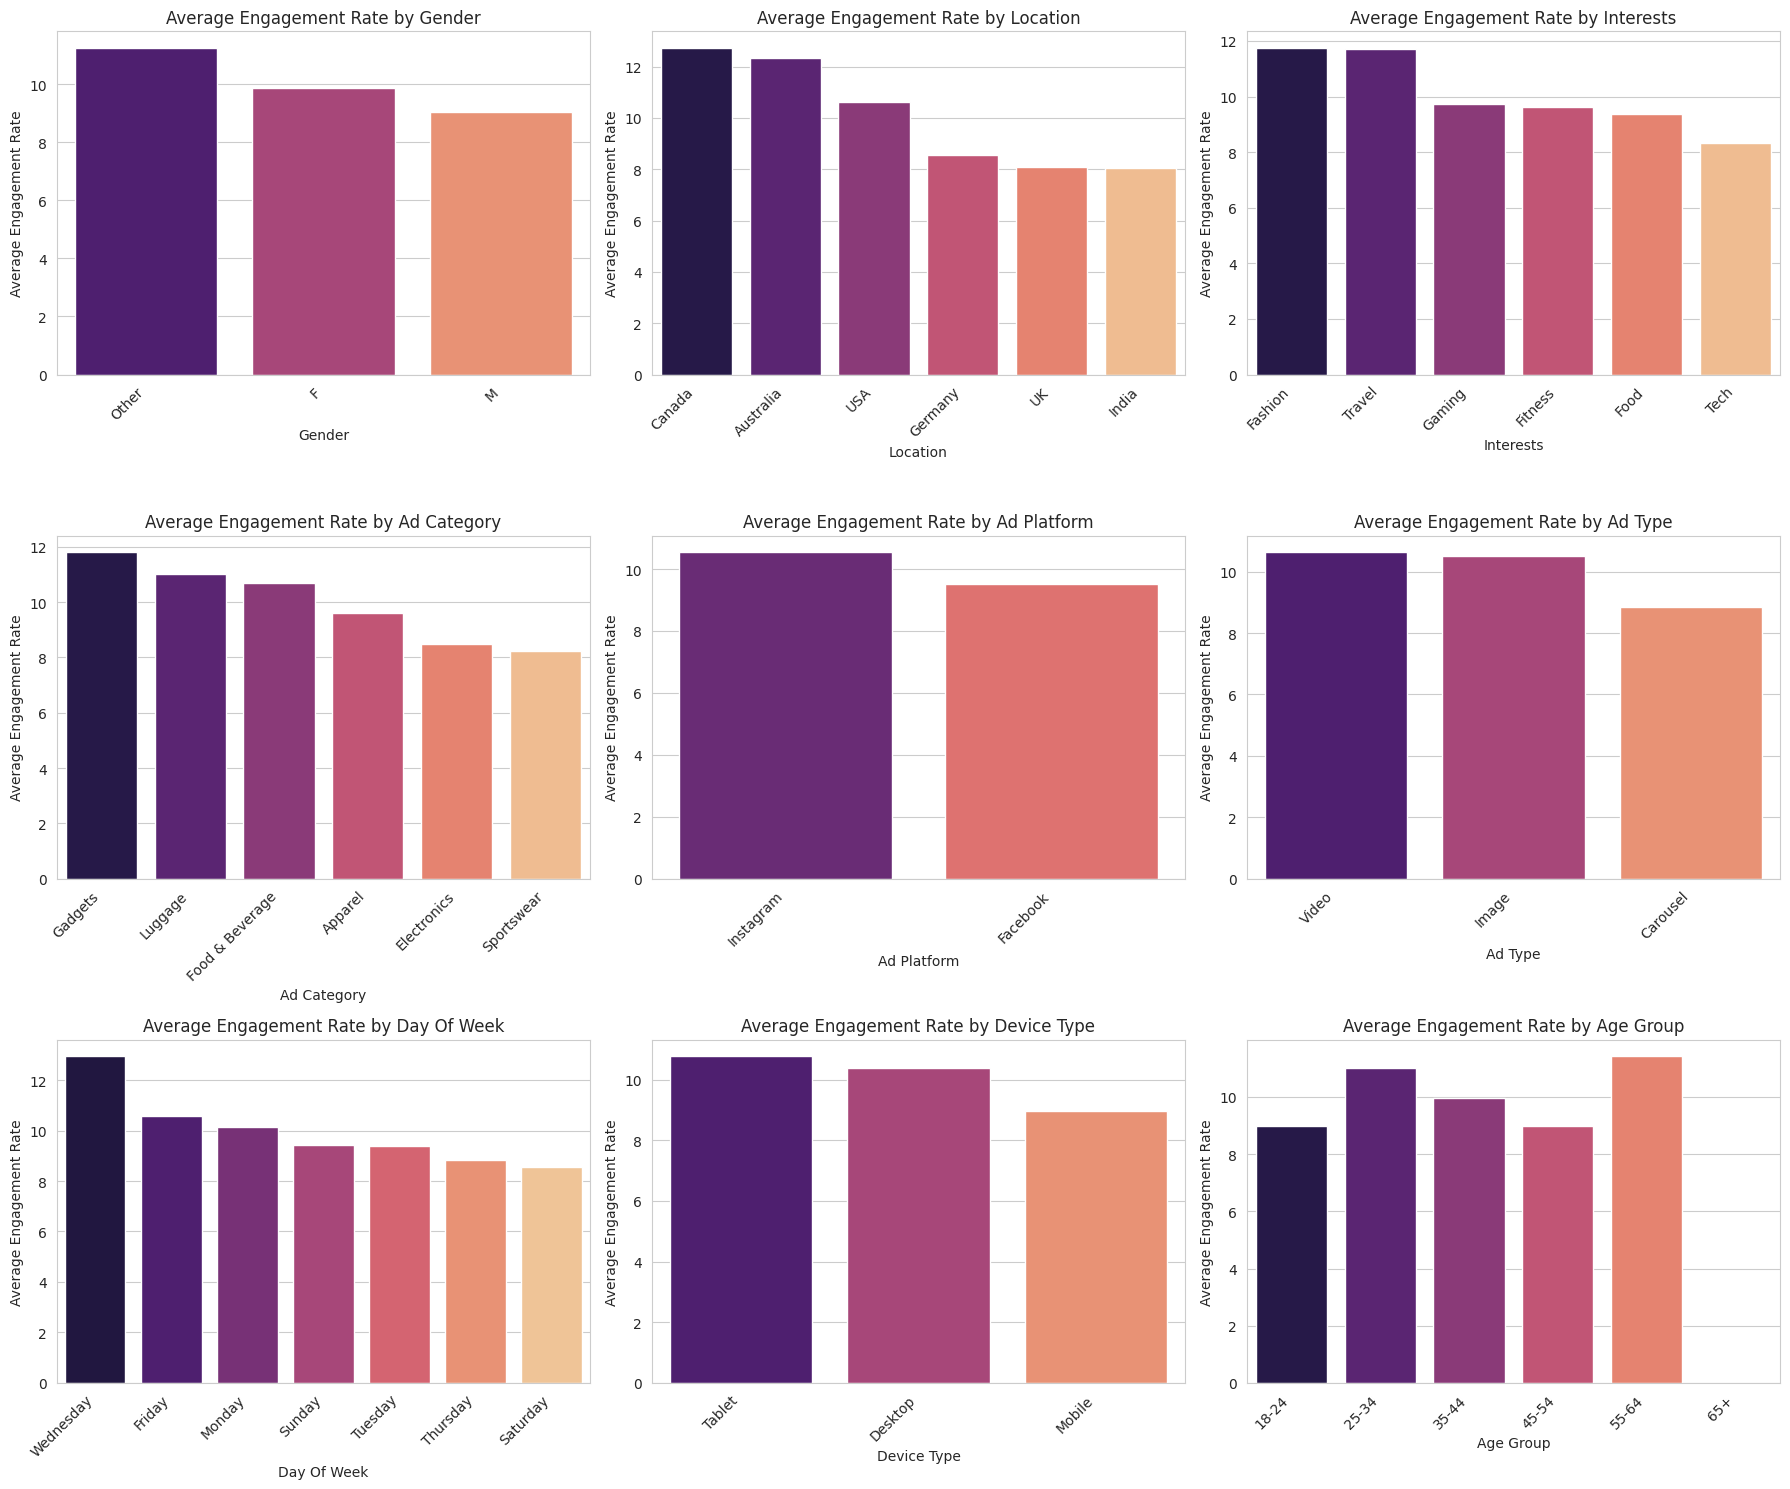

In [ ]:

# 2. Bar Charts for Averages of conversion_rate and engagement_rate by Categorical Variables

metrics_to_analyze = ['conversion_rate', 'engagement_rate']

for metric in metrics_to_analyze:
    plt.figure(figsize=(18, 15))
    for i, col in enumerate(categorical_cols):
        plt.subplot(3, 3, i + 1)
        avg_data = df.groupby(col)[metric].mean().sort_values(ascending=False)
        sns.barplot(x=avg_data.index, y=avg_data.values, palette='magma')
        plt.title(f'Average {metric.replace("_", " ").title()} by {col.replace("_", " ").title()}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel(f'Average {metric.replace("_", " ").title()}')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'average_{metric}_by_categories_bar_charts.png')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [ ]:
# Load the processed dataset (assuming it's available from the previous step)
# If not, regenerate it or ensure it's in the environment
try:
    df_processed = pd.read_csv('social_media_ad_optimization_processed.csv')
except FileNotFoundError:
    print("Processed CSV not found. Please ensure 'social_media_ad_optimization_processed.csv' is available.")
    # Fallback to original df if processed is not found, recalculate derived columns
    df_processed = pd.read_csv('social_media_ad_optimization.csv')
    bins = [18, 25, 35, 45, 55, 65, 100]
    labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
    df_processed['age_group'] = pd.cut(df_processed['age'], bins=bins, labels=labels, right=False)
    df_processed['conversion_rate'] = (df_processed['conversion'] / df_processed['clicks']) * 100
    df_processed['engagement_rate'] = (df_processed['engagement_score'] / df_processed['impressions']) * 100
    df_processed.loc[df_processed['clicks'] == 0, 'conversion_rate'] = 0
    df_processed.loc[df_processed['impressions'] == 0, 'engagement_rate'] = 0


In [ ]:

# Define features (X) and target (y)
X = df_processed.drop(['user_id', 'ad_id', 'conversion', 'conversion_rate', 'engagement_rate'], axis=1) # Drop identifiers and derived metrics
y = df_processed['conversion']

In [ ]:

# Identify categorical and numerical features for preprocessing
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep numerical features as they are
)


In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Original features: {X.columns.tolist()}")
print(f"Categorical features for encoding: {categorical_features.tolist()}")
print(f"Numerical features: {numerical_features.tolist()}")
print(f"Shape of X_train before preprocessing: {X_train.shape}")
print(f"Shape of X_test before preprocessing: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Original features: ['age', 'gender', 'location', 'interests', 'ad_category', 'ad_platform', 'ad_type', 'impressions', 'clicks', 'time_spent_on_ad', 'day_of_week', 'device_type', 'engagement_score', 'ctr', 'cvr', 'age_group']
Categorical features for encoding: ['gender', 'location', 'interests', 'ad_category', 'ad_platform', 'ad_type', 'day_of_week', 'device_type', 'age_group']
Numerical features: ['age', 'impressions', 'clicks', 'time_spent_on_ad', 'engagement_score', 'ctr', 'cvr']
Shape of X_train before preprocessing: (400, 16)
Shape of X_test before preprocessing: (100, 16)
Shape of y_train: (400,)
Shape of y_test: (100,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder


In [ ]:


# Re-define df_processed, X, y, X_train, X_test, y_train, y_test, preprocessor to ensure continuity
# This block is necessary if the interpreter resets or if this code is run independently
try:
    df_processed = pd.read_csv('social_media_ad_optimization_processed.csv')
except FileNotFoundError:
    print("Processed CSV not found. Re-creating derived columns from original.")
    df_processed = pd.read_csv('social_media_ad_optimization.csv')
    bins = [18, 25, 35, 45, 55, 65, 100]
    labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
    df_processed['age_group'] = pd.cut(df_processed['age'], bins=bins, labels=labels, right=False)
    df_processed['conversion_rate'] = (df_processed['conversion'] / df_processed['clicks']) * 100
    df_processed['engagement_rate'] = (df_processed['engagement_score'] / df_processed['impressions']) * 100
    df_processed.loc[df_processed['clicks'] == 0, 'conversion_rate'] = 0
    df_processed.loc[df_processed['impressions'] == 0, 'engagement_rate'] = 0

X = df_processed.drop(['user_id', 'ad_id', 'conversion', 'conversion_rate', 'engagement_rate'], axis=1)
y = df_processed['conversion']

categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:

# 1. Model Selection and Training
# Create a pipeline with preprocessing and a RandomForestClassifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'location', 'interests', 'ad_category', 'ad_platform',
       'ad_type', 'day_of_week', 'device_type', 'age_group'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


--- ROC AUC Score ---
ROC AUC: 1.0000


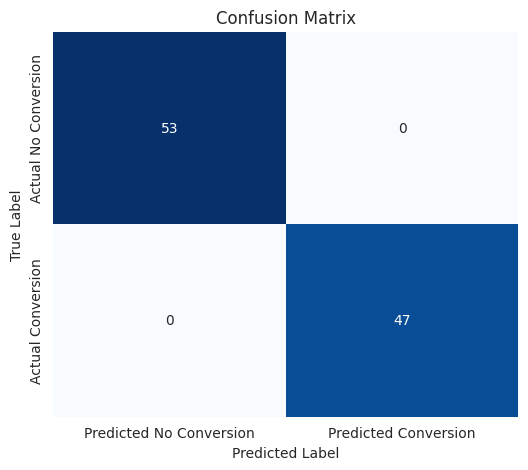

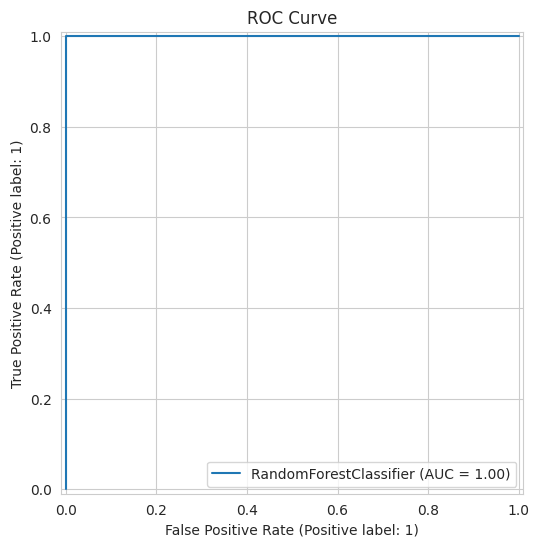

In [ ]:

# 2. Model Evaluation
y_pred = model_pipeline.predict(X_test)
y_proba = model_pipeline.predict_proba(X_test)[:, 1]

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- ROC AUC Score ---")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Conversion', 'Predicted Conversion'],
            yticklabels=['Actual No Conversion', 'Actual Conversion'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')
plt.show()

# ROC Curve
plt.figure(figsize=(7, 6))
roc_display = RocCurveDisplay.from_estimator(model_pipeline, X_test, y_test, ax=plt.gca(), name='RandomForestClassifier')
plt.title('ROC Curve')
plt.savefig('roc_curve.png')
plt.show()



--- Top 10 Feature Importances ---
                        feature  importance
47                          cvr    0.516844
45             engagement_score    0.260682
46                          ctr    0.036769
43                       clicks    0.030550
44             time_spent_on_ad    0.026142
42                  impressions    0.016251
41                          age    0.013623
17  ad_category_Food & Beverage    0.004176
23             ad_type_Carousel    0.003760
7                   location_UK    0.003742


/tmp/ipython-input-45-2860873860.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importances_df.head(15), palette='mako')


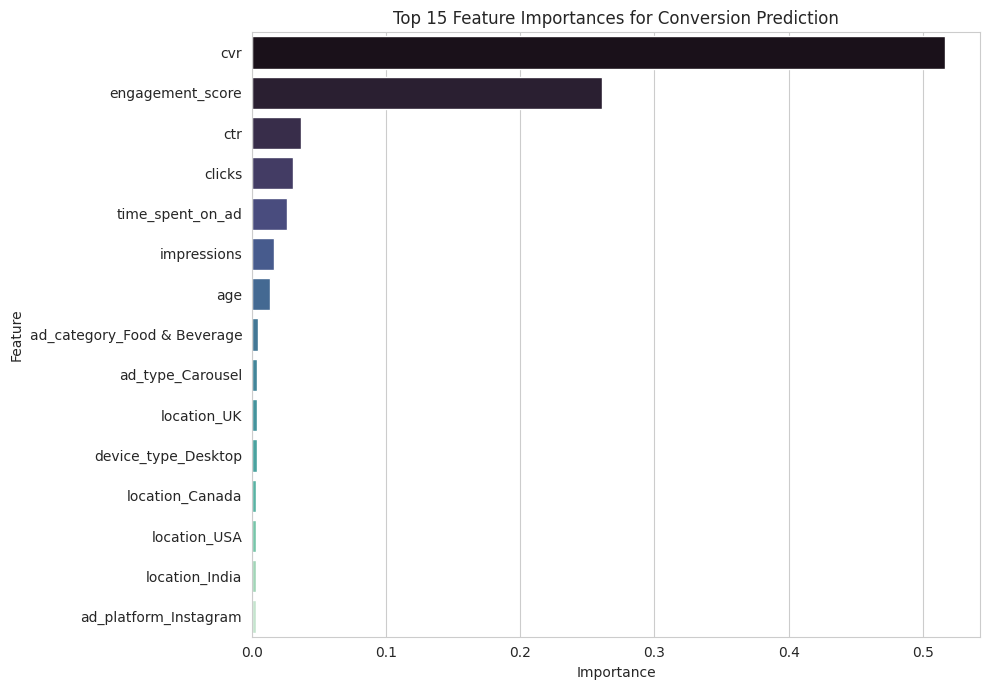

In [ ]:

# 3. Feature Importance
# Get feature names after one-hot encoding
ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([ohe_feature_names, numerical_features])

# Get feature importances from the trained classifier
feature_importances = model_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({'feature': all_feature_names, 'importance': feature_importances})
importances_df = importances_df.sort_values(by='importance', ascending=False)

print("\n--- Top 10 Feature Importances ---")
print(importances_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 7))
sns.barplot(x='importance', y='feature', data=importances_df.head(15), palette='mako')
plt.title('Top 15 Feature Importances for Conversion Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importances.png')
plt.show()